In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/loan/loan_data_2007_2014.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

In [ ]:
profile = ProfileReport(df, title="Profiling Report", minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.duplicated().sum()

0

In [ ]:
def summarize_missing_values(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    missing_summary = pd.DataFrame({
        'Missing Values': missing_values,
        'Missing Percentage (%)': missing_percentage
    })

    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

    print(missing_summary)

In [ ]:
summarize_missing_values(df)

                             Missing Values  Missing Percentage (%)
emp_title                             27588                5.916553
emp_length                            21008                4.505399
annual_inc                                4                0.000858
desc                                 340304               72.981975
title                                    21                0.004504
delinq_2yrs                              29                0.006219
earliest_cr_line                         29                0.006219
inq_last_6mths                           29                0.006219
mths_since_last_delinq               250351               53.690554
mths_since_last_record               403647               86.566585
open_acc                                 29                0.006219
pub_rec                                  29                0.006219
revol_util                              340                0.072917
total_acc                                29     

In [ ]:
df = df.drop(columns=[df.columns[0]])

In [ ]:
df = df.dropna(axis=1, how='all')

In [ ]:
df = df.drop(columns=df.columns[df.isnull().mean() > 0.5])

In [ ]:
df.shape

(466285, 53)

In [ ]:
summarize_missing_values(df)

                            Missing Values  Missing Percentage (%)
emp_title                            27588                5.916553
emp_length                           21008                4.505399
annual_inc                               4                0.000858
title                                   21                0.004504
delinq_2yrs                             29                0.006219
earliest_cr_line                        29                0.006219
inq_last_6mths                          29                0.006219
open_acc                                29                0.006219
pub_rec                                 29                0.006219
revol_util                             340                0.072917
total_acc                               29                0.006219
last_pymnt_d                           376                0.080637
next_pymnt_d                        227214               48.728567
last_credit_pull_d                      42                0.00

In [ ]:
df = df.apply(lambda col: col.fillna(col.mean()) if pd.api.types.is_numeric_dtype(col)
              else col.fillna(col.mode()[0]))

In [ ]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                  0
last_pymnt_amnt               0
next_pymnt_d                  0
last_credit_pull_d            0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

In [ ]:
for col in df.select_dtypes(include=[float, int]).columns:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   

   int_rate  installment grade sub_grade                  emp_title  \
0     10.65       162.87     B        B2                    Teacher   
2     15.96        84.33     C        C5                    Teacher   
4     12.69        67.79     B        B5   University Medical Group   
6     15.96       170.08     C        C5  Southern Star Photography   
7     18.64       109.43     E        E1            MKC Accounting    

  emp_length home_ownership  annual_inc verification_status issue_d  \
0  10+ years           RENT     24000.0            Verified  Dec-11   
2  10+ years           RENT     12252.0        Not Verified  Dec-11   
4     1 year           RENT     80000.0     Source Verified  Dec-11   
6    8 years           RENT     47004.0        Not Verified  Dec-11   
7    9 years           RENT     48000.0     Source Verified  Dec-11   

  loan_status pymnt_plan                                                url  \
0  Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   
2  Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   
4     Current          n  https://www.lendingclub.com/browse/loanDetail....   
6     Current          n  https://www.lendingclub.com/browse/loanDetail....   
7  Fully Paid          n  https://www.lendingclub.com/browse/loanDetail....   

              purpose                 title zip_code addr_state    dti  \
0         credit_card              Computer    860xx         AZ  27.65   
2      small_business  real estate business    606xx         IL   8.72   
4               other              Personal    972xx         OR  17.94   
6  debt_consolidation                  Loan    280xx         NC  23.51   
7                 car       Car Downpayment    900xx         CA   5.35   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0          0.0           Jan-85             1.0       3.0      0.0      13648   
2          0.0           Nov-01             2.0       2.0      0.0       2956   
4          0.0           Jan-96             0.0      15.0      0.0      27783   
6          0.0           Jul-05             1.0       7.0      0.0      17726   
7          0.0           Jan-07             2.0       4.0      0.0       8221   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        83.7        9.0                   f       0.00           0.00   
2        98.5       10.0                   f       0.00           0.00   
4        53.9       38.0                   f     766.90         766.90   
6        85.6       11.0                   f    1889.15        1889.15   
7        87.5        4.0                   f       0.00           0.00   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0  5861.071414          5831.78          5000.00         861.07   
2  3003.653644          3003.65          2400.00         603.65   
4  3242.170000          3242.17          2233.10        1009.07   
6  8136.840000          8136.84          5110.85        3025.99   
7  3938.144334          3938.14          3000.00         938.14   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                 0.0         0.0                      0.0       Jan-15   
2                 0.0         0.0                      0.0       Jun-14   
4                 0.0         0.0                      0.0       Jan-16   
6                 0.0         0.0                      0.0       Jan-16   
7                 0.0         0.0                      

In [ ]:
print(df['loan_status'].unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Default' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [ ]:
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':-1,
               'In Grace Period':-1,
               'Late (16-30 days)':-1}

df['loan_status'] = df['loan_status'].map(target_dict)

df = df.dropna(subset=['loan_status'])
df = df.loc[~df['loan_status'].isin([-1])].reset_index(drop=True)

df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077175    1313524       2400         2400           2400.0   36 months   
2  1072053    1288686       3000         3000           3000.0   36 months   
3  1070078    1305201       6500         6500           6500.0   60 months   
4  1069908    1305008      12000        12000          12000.0   36 months   

   int_rate  installment grade sub_grade              emp_title emp_length  \
0     10.65       162.87     B        B2                Teacher  10+ years   
1     15.96        84.33     C        C5                Teacher  10+ years   
2     18.64       109.43     E        E1        MKC Accounting     9 years   
3     14.65       153.45     C        C3  Southwest Rural metro    5 years   
4     12.69       402.54     B        B5                   UCLA  10+ years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11            1   
1           RENT     12252.0        Not Verified  Dec-11            1   
2           RENT     48000.0     Source Verified  Dec-11            1   
3            OWN     72000.0        Not Verified  Dec-11            1   
4            OWN     75000.0     Source Verified  Dec-11            1   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

              purpose                       title zip_code addr_state    dti  \
0         credit_card                    Computer    860xx         AZ  27.65   
1      small_business        real estate business    606xx         IL   8.72   
2                 car             Car Downpayment    900xx         CA   5.35   
3  debt_consolidation  High intrest Consolidation    853xx         AZ  16.12   
4  debt_consolidation               Consolidation    913xx         CA  10.78   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0          0.0           Jan-85             1.0       3.0      0.0      13648   
1          0.0           Nov-01             2.0       2.0      0.0       2956   
2          0.0           Jan-07             2.0       4.0      0.0       8221   
3          0.0           Jan-98             2.0      14.0      0.0       4032   
4          0.0           Oct-89             0.0      12.0      0.0      23336   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        83.7        9.0                   f        0.0            0.0   
1        98.5       10.0                   f        0.0            0.0   
2        87.5        4.0                   f        0.0            0.0   
3        20.6       23.0                   f        0.0            0.0   
4        67.1       34.0                   f        0.0            0.0   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5861.071414          5831.78           5000.0         861.07   
1   3003.653644          3003.65           2400.0         603.65   
2   3938.144334          3938.14           3000.0         938.14   
3   7677.520000          7677.52           6500.0        1177.52   
4  13943.080000         13943.08          12000.0        1943.08   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                 0.0         0.0                      0.0       Jan-15   
1                 0.0         0.0                      0.0       Jun-14   
2                 0.0         0.0                      0.0       Jan-15   
3                 0.0         0.0                      0.0       Jun-13   
4                 0.0         0

In [ ]:
from pycaret.classification import *

clf1 = setup(df, target='loan_status', session_id=123)
top_models = compare_models(include=['lr', 'dt', 'rf'])
final_model = finalize_model(top_models)

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

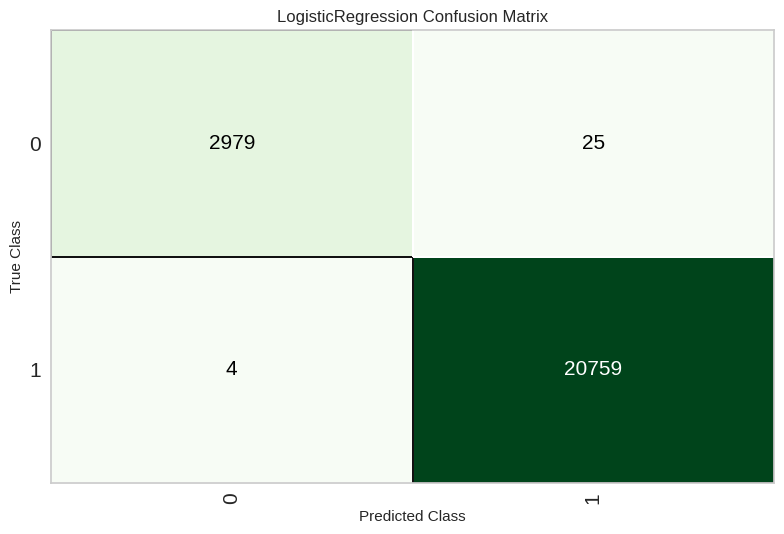

In [ ]:
plot_model(top_models, plot='confusion_matrix')